In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

sns.set(style="whitegrid", context="notebook")

# 1. Load data
df = pd.read_csv("IMDb Movies India.csv", encoding="latin-1")

# Keep only rows with a rating
df = df.dropna(subset=["Rating"])

In [10]:
# 2. Clean numeric columns
df["Year"] = df["Year"].str.extract(r"(\d+)").astype(float)
df["Duration"] = df["Duration"].str.extract(r"(\d+)").astype(float)
df["Votes"] = df["Votes"].str.replace(",", "").astype(float)

for col in ["Year", "Duration", "Votes"]:
    df[col] = df[col].fillna(df[col].median())

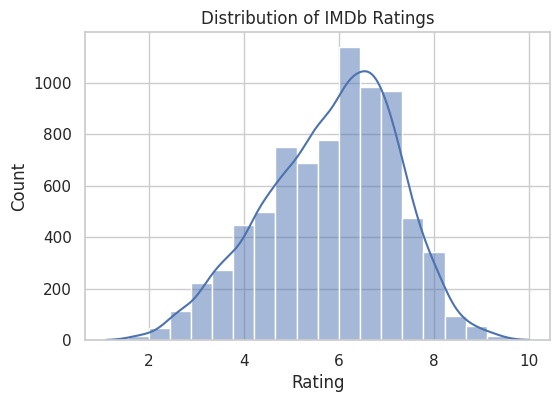

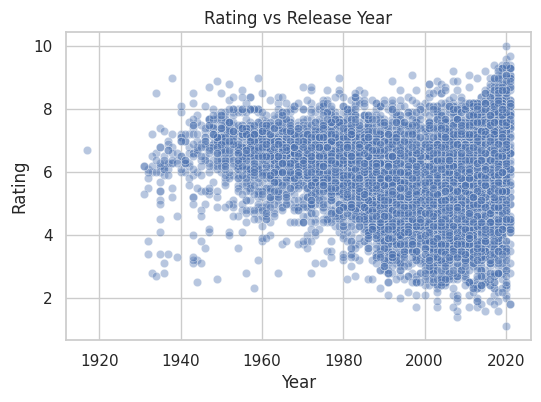

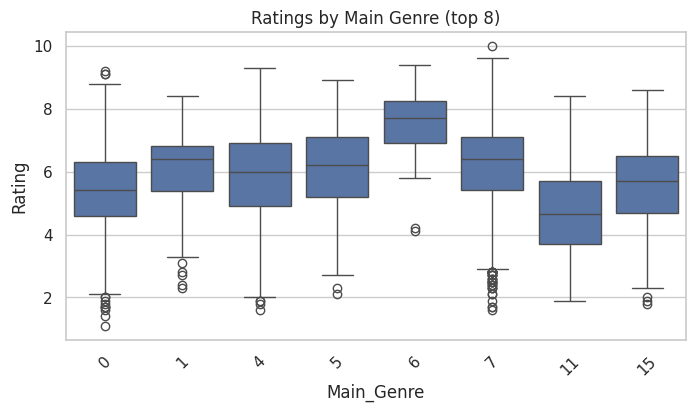

In [11]:
# 3. Handle categorical columns
cat_cols = ["Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
for col in cat_cols:
    df[col] = df[col].fillna("Unknown")

# Use only first genre as main genre
df["Main_Genre"] = df["Genre"].apply(lambda x: str(x).split(",")[0].strip())

# Label encode selected categorical features (per‑column encoders)
encoders = {}
for col in ["Main_Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    encoders[col] = le  # stored if you ever need inverse_transform

plt.figure(figsize=(6,4))
sns.histplot(df["Rating"], bins=20, kde=True)
plt.title("Distribution of IMDb Ratings")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x="Year", y="Rating", data=df, alpha=0.4)
plt.title("Rating vs Release Year")
plt.show()

plt.figure(figsize=(8,4))
top_genres = df["Main_Genre"].value_counts().head(8).index
sns.boxplot(
    x="Main_Genre",
    y="Rating",
    data=df[df["Main_Genre"].isin(top_genres)]
)
plt.xticks(rotation=45)
plt.title("Ratings by Main Genre (top 8)")
plt.show()

In [12]:
# 4. Features and target
feature_cols = ["Year", "Duration", "Votes", "Main_Genre", "Director", "Actor 1", "Actor 2", "Actor 3"]
X = df[feature_cols]
y = df["Rating"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
# 5. Model
rf = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)   # compute MSE
rmse = np.sqrt(mse)                        # then take square root
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Absolute Error: 0.84
Root Mean Squared Error: 1.11
R-squared Score: 0.34


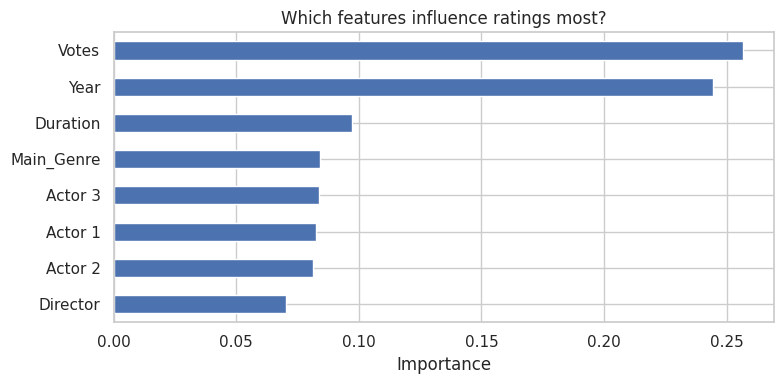

In [14]:
# 6. Feature importance
plt.figure(figsize=(8, 4))
feat_imp = pd.Series(rf.feature_importances_, index=feature_cols)
feat_imp.sort_values().plot(kind="barh")
plt.title("Which features influence ratings most?")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()